In [7]:
import os
import cv2
import numpy as np
import SimpleITK as sitk
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pydicom as dicom
import glob
from scipy import misc
import scipy.misc
import imageio
import pandas as pd
import numpy as np
from PIL import Image
import pydicom
from pydicom.data import get_testdata_files
from pydicom.pixel_data_handlers.util import apply_voi_lut


In [8]:
dataset_path = '/storage/ziaeea21/projects/Prostate_Segmentation/data/orginal_image/*.dcm'
save_path = "/storage/ziaeea21/projects/Prostate_Segmentation/data/Train/images/"

In [9]:
def get_imgs_path(dataset_path = '/*.dcm'):
 
    return glob.glob(dataset_path)

def imgs_preprocessing(imgs_paths):
    health=[]
    for i2, file_path2 in enumerate(imgs_paths):
        
        ds = pydicom.dcmread(file_path2)
        image_2d = ds.pixel_array.astype(float)
        image_2d = cv2.resize( image_2d  , (256 , 256))
        image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0
        image_2d_scaled = np.uint8(image_2d_scaled)
        rgb = np.stack([image_2d_scaled]*3, axis=2)
        health.append(rgb)
    
    images = np.array(health)
    return images

def save_imgs(images, save_path):
    os.makedirs(save_path, exist_ok= True)
    for i in range(len(images)):
        Slice = images[i,:,:]
        Name = save_path + "Slices0144%s"%(i)+".png"  
        imageio.imwrite(Name,Slice,)
        
def show_image(images):
    rnd_img = np.random.randint(0,images.shape[0])
    plt.imshow(images[rnd_img,:,:,:])
    

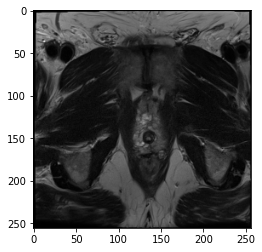

In [10]:
imgs_path = get_imgs_path(dataset_path)
images = imgs_preprocessing(imgs_path)
show_image(images)

In [11]:
save_imgs(images, save_path)